In [3]:
# 2.1 Preprocess the raw data

#     Check whether there are missing values
#     Check whether theare are cateogrical features
#     Centering the data

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('heart.csv')

print(df.isnull().sum())
print('\nThere are no missing values\n')

print(df.info())
print('\nThere are no categorical values\n')

heartData = df.drop('target', axis=1)

heartData -= np.mean(heartData, axis = 0)


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There are no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
me

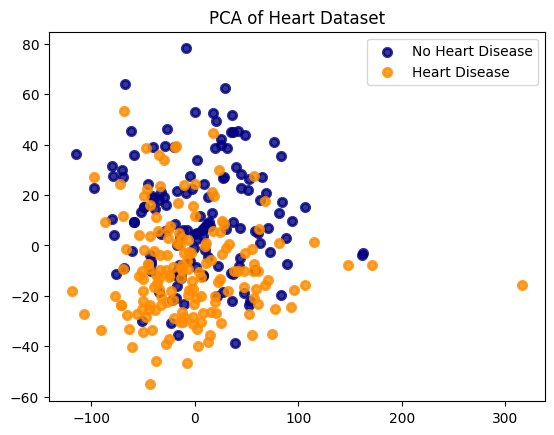

In [7]:
# 2.2 Use PCA to do dimensionality reduction for visualization

#     Please reduce the number of features to 2 and visualize this dataset by following the given example.

import matplotlib.pyplot as plt

pca = PCA(n_components=2)
heatData_r = pca.fit(heartData).transform(heartData)

target_names = ['No Heart Disease', 'Heart Disease']

plt.figure()
colors = ['navy', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(heatData_r[df['target'] == i, 0], heatData_r[df['target'] == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Heart Dataset')
plt.show()


In [16]:
# 2.3 Use PCA to do dimensionality reduction and then conduct classification

#     Please reduce the number of features to different values (e.g. 2, 5, 10)
#     Then, please run logistic regression model with the dimensionality-reduced data.
#     Compare the classification performance (e.g. accuracy, F1-score) when using different number of features(e.g. 2, 5, 10).

numbers = [2, 5, 10]

for val in numbers:
    pca = PCA(n_components=val)
    pca_heartData = pca.fit(heartData).transform(heartData)
    X_train_val, X_test, y_train_val, y_test = train_test_split(pca_heartData, df['target'], 
                                                            test_size=0.15, 
                                                            random_state=0)
    normalizer = StandardScaler()
    X_train_val = normalizer.fit_transform(X_train_val)
    X_test = normalizer.transform(X_test)
    clf = LogisticRegression(penalty='l2', solver='lbfgs')
    clf.fit(X_train_val, y_train_val)
    y_test_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    print("PCA n = " + str(val) + ": accuracy: {:.3f}, recall: {:.3f}, precision: {:.3f}, f1: {:.3f}".format(acc, recall, precision, f1))

PCA n = 2: accuracy: 0.761, recall: 0.913, precision: 0.700, f1: 0.792
PCA n = 5: accuracy: 0.870, recall: 0.913, precision: 0.840, f1: 0.875
PCA n = 10: accuracy: 0.870, recall: 0.870, precision: 0.870, f1: 0.870
